In [47]:
import pandas as pd

#url에서 dataframe으로 데이터 로드
url = "https://raw.githubusercontent.com/rasbt/python-machine-learning-book-3rd-edition/master/ch10/housing.data.txt"
df = pd.read_csv(filepath_or_buffer=url, header=None, sep="\s+")
#열 이름 지정
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 
'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
#모든 항목을 표시하려면 head() 제거
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


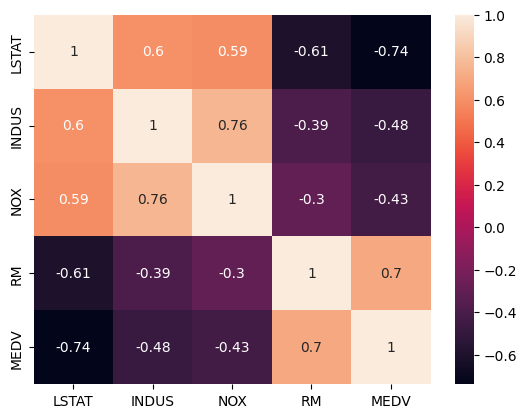

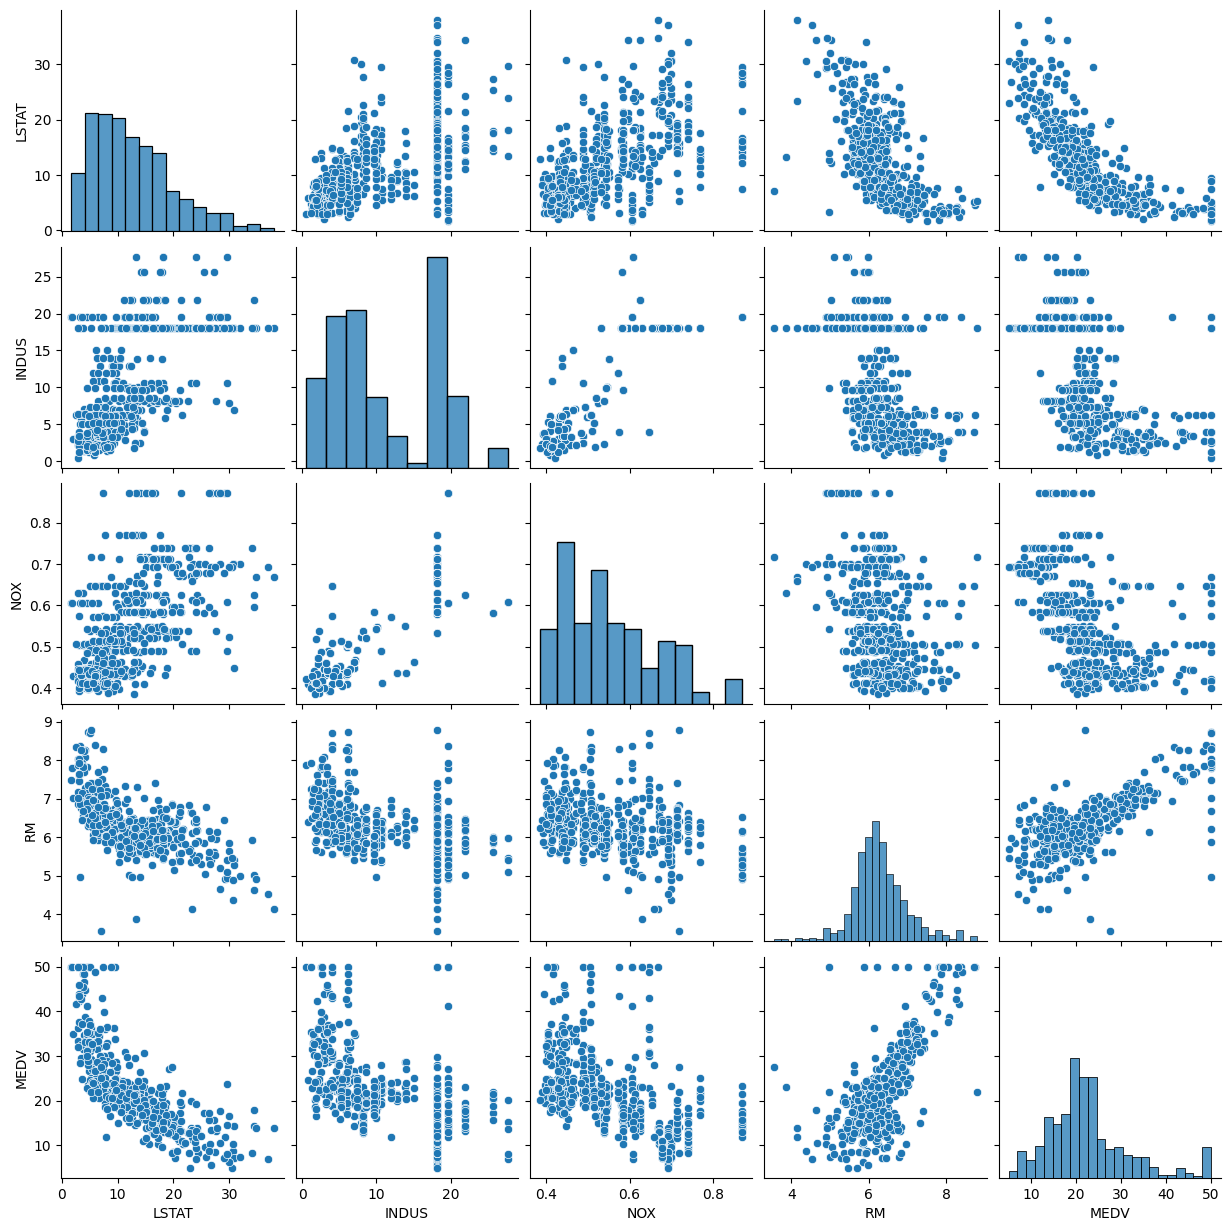

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
# 열
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']
# 상관관계 행렬
correlation_matrix = df[cols].corr().round(2) 
sns.heatmap(data=correlation_matrix, annot=True)

sns.pairplot(data=df, x_vars=cols, y_vars=cols)
plt.show()

Slope: 9.102
Intercept: -34.671


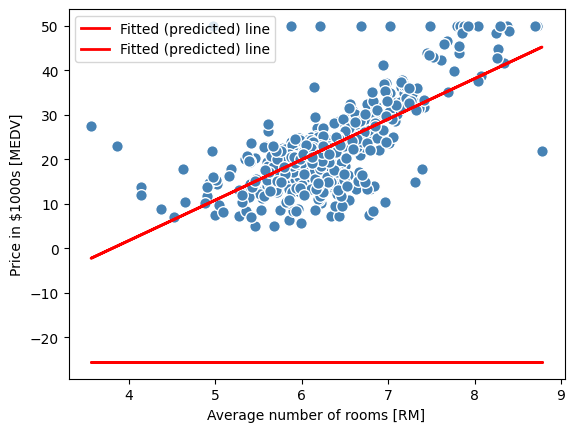

In [49]:
import numpy as np
# RM(예측변수) MEDV(대상) 변수를 각각 X,y로 선택
X = df[['RM']].values
y = df['MEDV'].values
# 절편항을 나타내는 1의 열을 생성
cols_of_ones = np.ones((X.shape[0], 1))
# 1의 열을 X에 추가
X_new = np.hstack((cols_of_ones, X))

# 행렬 연산을 사용하여 OLS 계수를 계산 #@는 행렬곱셈(내적)
# .T 행렬의 전치 연산
coeffs = np.linalg.inv(X_new.T @ X_new) @ X_new.T @ y
# 계산된 OLS계수에서 기울기와 절편 추출
intercept = coeffs[0]
slope = coeffs[1]
print('Slope: {:.3f}'.format(slope))
print('Intercept: {:.3f}'.format(intercept))


plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
# 예측계산
y_pred = intercept + slope * X_new
plt.plot(X, y_pred, color='red', lw=2, label='Fitted (predicted) line')

plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000s [MEDV]')
plt.legend()
plt.show()

Slope: 0.693
Intercept: 0.002


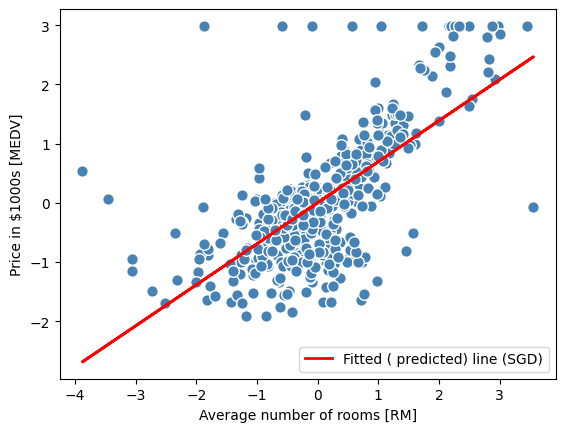

In [50]:
class LinearRegressionSGD(object):
    def __init__(self, eta=0.001, n_iter=20):
        """
        Initialize the linear regression model with given learning rate and number of iterations. 
        """
        #주어진 학습률과 반복 횟수로 선형 회귀 모델을 초기화
        self.eta = eta # Learning rate
        self.n_iter = n_iter # Iterations

    def predict(self, X):
        """
        Predict the target variable using the linear regression model.
        """
        #선형 회귀 모델을 사용하여 대상 변수를 예측
        return np.dot(X, self.w_[1:]) + self.w_[0]
    def fit(self, X, y):
        """
        Train the linear regression model using stochastic gradient descent (SGD).
        """
        #가중치를 0으로 초기화하고 편향항에 1을 더함
        self.w_ = np.zeros(1 + X.shape[1]) 
        for i in range(self.n_iter): # 지정된 에포크 수만큼 반복
            X, y = self.shuffle(X, y) # 상관 업데이트를 피하기 위해 데이터셔플
            
            for xi, target in zip(X, y): # 예제 반복
                output = self.predict(xi) # 현재 가중치를 이용하여 대상 변수 예측
                errors = (target - output) # 예측 값, 실제 값
                self.w_[1:] += self.eta * errors * xi # 각 기능에 대한 가중치 업데이트
                self.w_[0] += self.eta * errors.sum() # 편향 항 업데이트

    def shuffle(self, X, y): 
        """
        Shuffle the data and the corresponding target values prevent the model to stuck in local minimum. 
        """
        #데이터와 해당 대상 값을 섞으면 모델이 로컬 최소값에 고정되지 않음
        np.random.seed(2022) # 랜덤시드를 설정하여 같은 방식으로 모두 셔플
        r = np.random.permutation(len(y)) # 인덱스 랜덤 순열 생성
        return X[r], y[r] 
   
from sklearn.preprocessing import StandardScaler

# 예측변수(X) 대상(y) 변수에 대한 스케일러 생성
sc_x = StandardScaler() #스케일러 공부!!
sc_y = StandardScaler()

X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()
# SGD 모델로 선형 회기를 시작하고 적합(훈련)
lr = LinearRegressionSGD()
lr.fit(X_std, y_std)
slope_sgd = lr.w_[1:]
Intercept_sgd = lr.w_[0]
print('Slope: %.3f' % slope_sgd)
print('Intercept: %.3f' % Intercept_sgd)

plt.scatter(X_std, y_std, c='steelblue', edgecolor='white', s= 70)
y_pred_sgd = Intercept_sgd + slope_sgd * X_std
plt.plot(X_std, y_pred_sgd, color='red', lw=2, label='Fitted ( predicted) line (SGD)')

plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000s [MEDV]')
plt.legend()
plt.show()

Slope (Matrix Mul.): 9.102
Intercept (Matrix Mul.): -34.671

Slope (scikit-learn): 9.102
Intercept (scikit-learn): -34.671


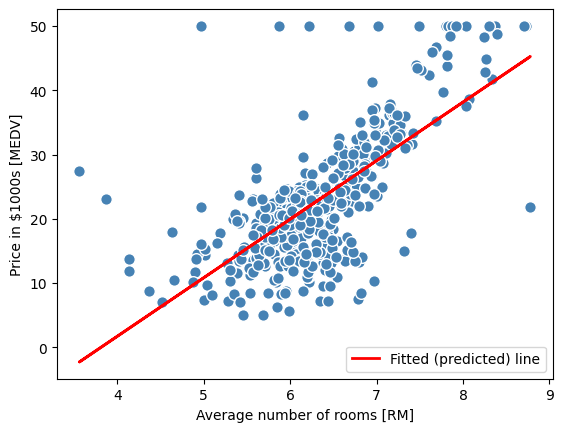

In [51]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X, y)
slope_scikit = slr.coef_[0]
intercept_scikit = slr.intercept_
print('Slope (Matrix Mul.): %.3f' % slope) 
print('Intercept (Matrix Mul.): %.3f' % intercept) 
print("")
print('Slope (scikit-learn): %.3f' % slope_scikit)
print('Intercept (scikit-learn): %.3f' % intercept_scikit)
plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
y_pred = intercept_scikit + slope_scikit * X
plt.plot(X, y_pred, color='red', lw=2, label='Fitted (predicted) line')

plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000s [MEDV]')
plt.legend()
plt.show()

In [52]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error
# 학습 데이터의 경우 데이터 세트를 70%로, 테스트 데이터의 경우 30%로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# 트레인 데이터에 적합
slr = LinearRegression()
slr.fit(X_train, y_train)
# 테스트 데이터 예측
y_test_pred = slr.predict(X_test)
# MSE계산
print('MSE: %.3f' % (mean_squared_error(y_test, y_test_pred)))

MSE: 47.033


In [55]:
sc_x = StandardScaler()
sc_y = StandardScaler()

x_train_std = sc_x.fit_transform(X_train)
y_train_std = sc_y.fit_transform(y_train[:, np.newaxis]).flatten()

lr = LinearRegressionSGD()
lr.fit(x_train_std, y_train_std)

x_test_std = sc_x.transform(X_test)
y_test_std = sc_y.transform(y_test[:, np.newaxis]).flatten()

y_test_pred_std = lr.predict(x_test_std)

y_test_pred = sc_y.inverse_transform(y_test_pred_std[:, np.newaxis]).flatten()

#MSE계산
print('MSE : %.3f' % (mean_squared_error(y_test, y_test_pred)))


MSE : 47.029


In [56]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error
# 학습 데이터의 경우 데이터 세트를 70%로, 테스트 데이터의 경우 30%로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=0)
# 트레인 데이터에 적합
slr = LinearRegression()
slr.fit(X_train, y_train)
# 테스트 데이터 예측
y_test_pred = slr.predict(X_test)
# MSE계산
print('MSE: %.3f' % (mean_squared_error(y_test, y_test_pred)))

MSE: 41.989


In [57]:
sc_x = StandardScaler()
sc_y = StandardScaler()

x_train_std = sc_x.fit_transform(X_train)
y_train_std = sc_y.fit_transform(y_train[:, np.newaxis]).flatten()

lr = LinearRegressionSGD()
lr.fit(x_train_std, y_train_std)

x_test_std = sc_x.transform(X_test)
y_test_std = sc_y.transform(y_test[:, np.newaxis]).flatten()

y_test_pred_std = lr.predict(x_test_std)

y_test_pred = sc_y.inverse_transform(y_test_pred_std[:, np.newaxis]).flatten()

#MSE계산
print('MSE : %.3f' % (mean_squared_error(y_test, y_test_pred)))


MSE : 41.465
